 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns_data = pd.read_csv(whale_returns_csv, index_col='Date', parse_dates=True)

In [3]:
# Count nulls
whale_returns_data.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [4]:
# Drop nulls
whale_returns_data = whale_returns_data.dropna()
whale_returns_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_data = pd.read_csv(algo_returns_csv, index_col='Date', parse_dates=True)

In [6]:
# Count nulls
algo_returns_data.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [7]:
# Drop nulls
algo_returns_data = algo_returns_data.dropna()
algo_returns_data.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [8]:
# Reading S&P 500 Closing Prices
sp500_closing_csv = Path("Resources/sp500_history.csv")
sp500_closing_data = pd.read_csv(sp500_closing_csv, index_col='Date', parse_dates=True)

In [9]:
# Check Data Types
sp500_closing_data.dtypes

Close    object
dtype: object

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Fix Data Types
sp500_closing_data['Close'] = sp500_closing_data['Close'].str.replace('$', '').astype(float)
sp500_closing_data.dtypes

# I'm not sure why I'm getting a warning message that says:
#C:\Users\flami\AppData\Local\Temp\ipykernel_10468\955118571.py:2: FutureWarning: The default value of regex will change from
#True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings
#when regex=True. Can I get a reason why that is to do better in the future?

C:\Users\flami\AppData\Local\Temp\ipykernel_11964\300308704.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_closing_data['Close'] = sp500_closing_data['Close'].str.replace('$', '').astype(float)


Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
sp500_daily_returns = sp500_closing_data.pct_change()

In [12]:
# Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna()
sp500_daily_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.rename(columns = {'Close': 'SP500'}, inplace = True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
df_returns = pd.concat([whale_returns_data, algo_returns_data, sp500_daily_returns], axis = 'columns', join = 'inner')
df_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

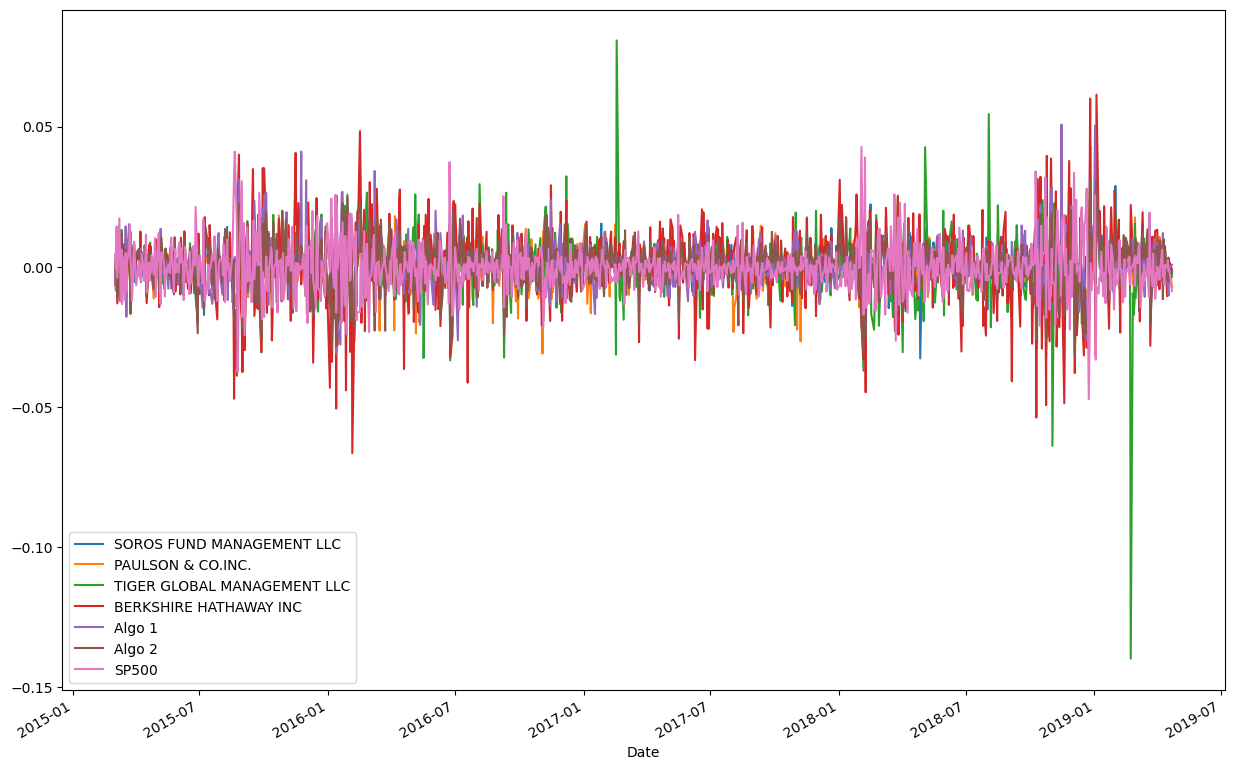

In [15]:
# Plot daily returns of all portfolios
df_returns.plot(figsize = (15,10))

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

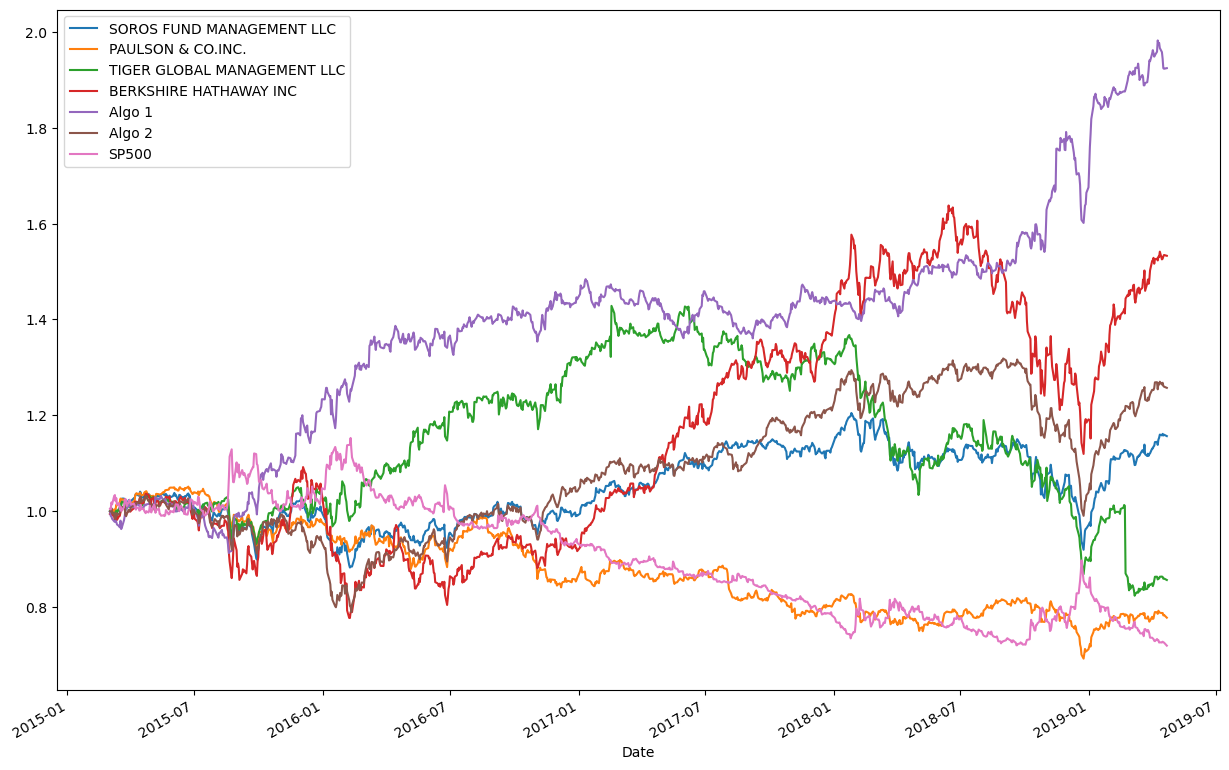

In [16]:
# Calculate cumulative returns of all portfolios
df_cumulative = (1 + df_returns).cumprod()
# Plot cumulative returns
df_cumulative.plot(figsize = (15,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

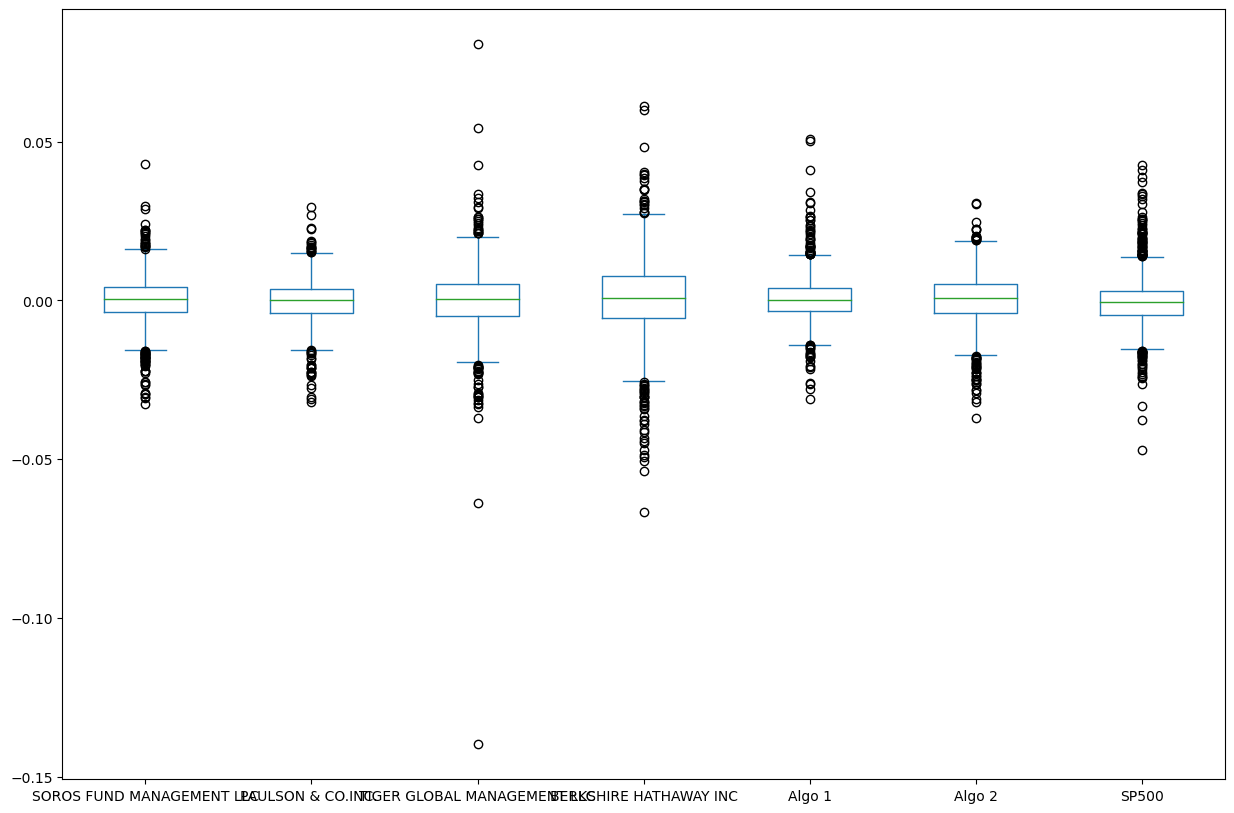

In [17]:
# Box plot to visually show risk
df_returns.plot.box(figsize = (15,10))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
df_returns_std = pd.DataFrame(df_returns.std()).rename(columns = {0: 'STD'})
df_returns_std

,STD
SOROS FUND MANAGEMENT LLC,0.007896
PAULSON & CO.INC.,0.007026
TIGER GLOBAL MANAGEMENT LLC,0.010897
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007623
Algo 2,0.008341
SP500,0.008587


### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = df_returns_std[df_returns_std['STD'] == df_returns_std.loc['SP500', 'STD']]
sp500_std
# Determine which portfolios are riskier than the S&P 500
riskier_std = df_returns_std[df_returns_std['STD'] > df_returns_std.loc['SP500', 'STD']]
riskier_std

,STD
TIGER GLOBAL MANAGEMENT LLC,0.010897
BERKSHIRE HATHAWAY INC,0.012919


### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
df_annual_std = df_returns_std*np.sqrt(252)
df_annual_std

,STD
SOROS FUND MANAGEMENT LLC,0.125348
PAULSON & CO.INC.,0.111527
TIGER GLOBAL MANAGEMENT LLC,0.172989
BERKSHIRE HATHAWAY INC,0.205079
Algo 1,0.121006
Algo 2,0.132413
SP500,0.136313


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

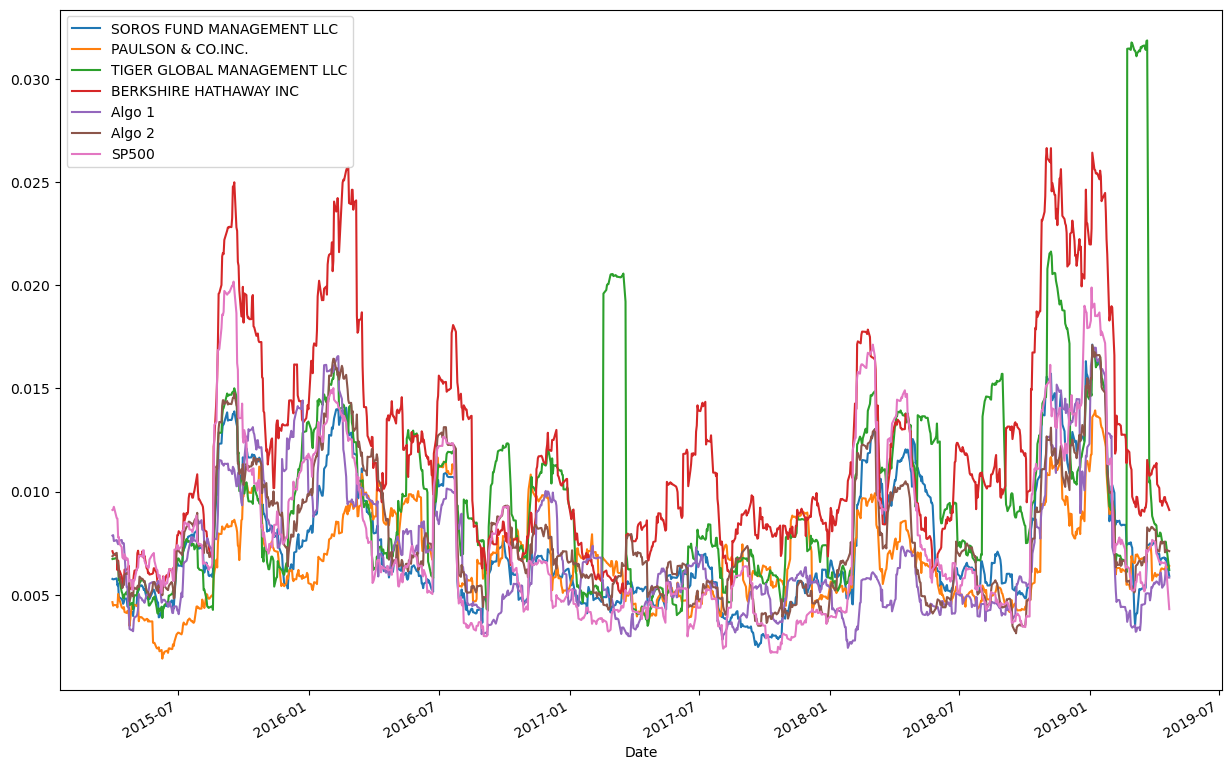

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
df_rolling_21 = df_returns.rolling(window = 21).std()
# Plot the rolling standard deviation
df_rolling_21.plot(figsize = (15,10))

### Calculate and plot the correlation

In [22]:
# Calculate the correlation
sp500_correlation = df_returns.corr().loc['SP500']
# Display de correlation matrix
sp500_correlation

SOROS FUND MANAGEMENT LLC      0.000574
PAULSON & CO.INC.              0.013549
TIGER GLOBAL MANAGEMENT LLC   -0.001505
BERKSHIRE HATHAWAY INC        -0.013856
Algo 1                        -0.033963
Algo 2                        -0.002192
SP500                          1.000000
Name: SP500, dtype: float64

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: title={'center': '60 Day Beta of Algo 2'}, xlabel='Date'>

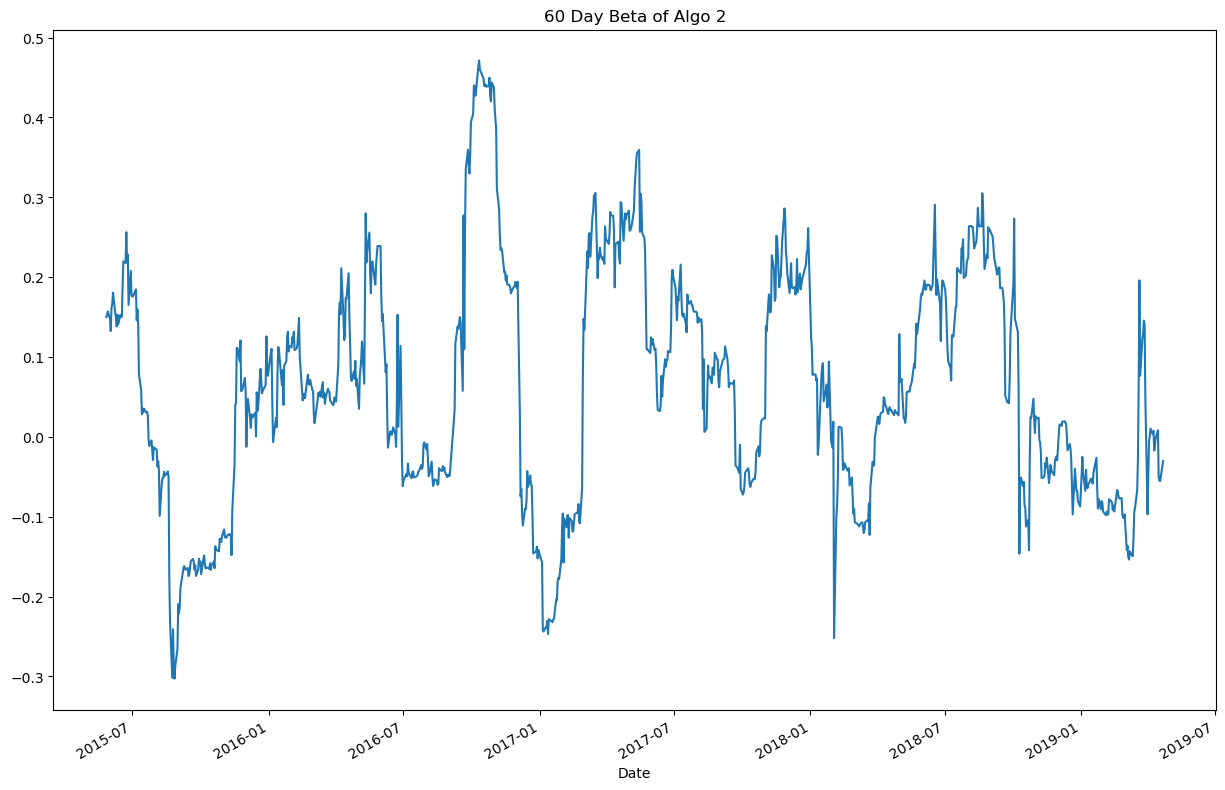

In [23]:
# Calculate covariance of a single portfolio
algo_2_covariance = df_returns['Algo 2'].rolling(window = 60).cov(df_returns['SP500'])
# Calculate variance of S&P 500
sp500_variance = df_returns['SP500'].rolling(window = 60).var()
# Computing beta
beta = algo_2_covariance / sp500_variance
# Plot beta trend
beta.plot(figsize = (15, 10), title = '60 Day Beta of Algo 2')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: xlabel='Date'>

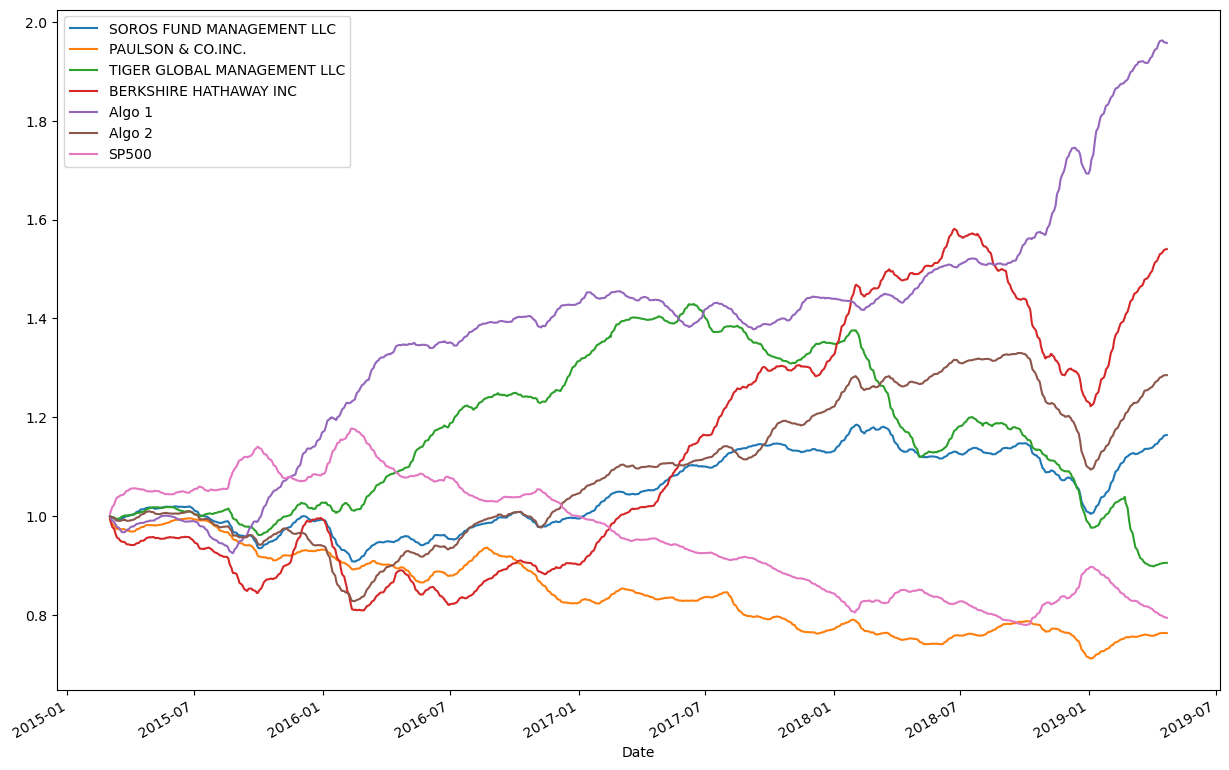

In [24]:
# Use `ewm` to calculate the rolling window
df_return_ewm = df_returns.ewm(span = 21, adjust = False).mean()
(1+ df_return_ewm).cumprod().plot(figsize = (15, 10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
annual_sharpe_ratios = df_returns.mean()*252 / (df_returns.std()*np.sqrt(252))
annual_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP500                         -0.518582
dtype: float64

<Axes: title={'center': 'Annual Sharpe Ratio'}>

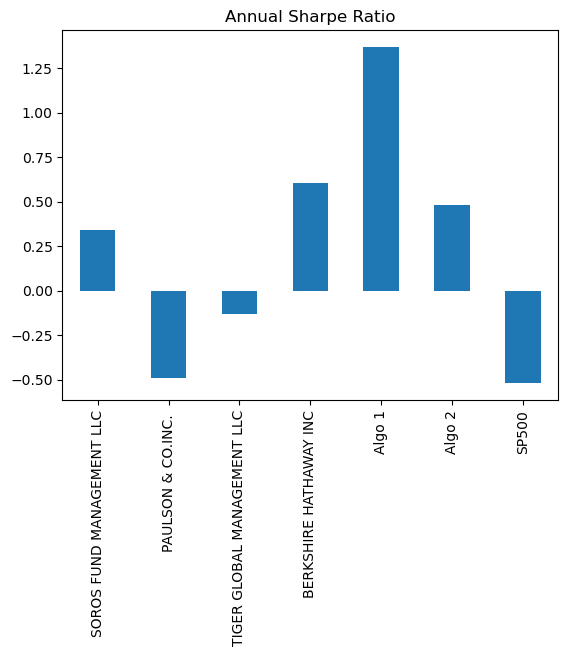

In [26]:
# Visualize the sharpe ratios as a bar plot
annual_sharpe_ratios.plot(kind = 'bar', title = 'Annual Sharpe Ratio')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---
Algo 1 outperformed S&P 500 and whales portfolio while Algo 2 does the same with the exception of BHI


# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Reading data from 1st stock
aapl_history_csv = Path('Resources/aapl_historical.csv')
aapl_history_data = pd.read_csv(aapl_history_csv, index_col='Trade DATE', parse_dates=True)
aapl_history_data.rename(columns = {'NOCP': 'AAPL'}, inplace = True)
aapl_history_data.drop(columns = ['Symbol'], inplace = True)
aapl_history_data

,AAPL
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75
...,...
2018-05-17,186.99
2018-05-16,188.18
2018-05-15,186.44


In [28]:
# Reading data from 2nd stock
goog_history_csv = Path('Resources/goog_historical.csv')
goog_history_data = pd.read_csv(goog_history_csv, index_col='Trade DATE', parse_dates=True)
goog_history_data.rename(columns = {'NOCP': 'GOOG'}, inplace = True)
goog_history_data.drop(columns = ['Symbol'], inplace = True)
goog_history_data

,GOOG
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40
...,...
2018-05-17,1078.59
2018-05-16,1081.77
2018-05-15,1079.23


In [29]:
# Reading data from 3rd stock
cost_history_csv = Path('Resources/cost_historical.csv')
cost_history_data = pd.read_csv(cost_history_csv, index_col='Trade DATE', parse_dates=True)
cost_history_data.rename(columns = {'NOCP': 'COST'}, inplace = True)
cost_history_data.drop(columns = ['Symbol'], inplace = True)
cost_history_data

,COST
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62
...,...
2018-05-17,199.60
2018-05-16,198.71
2018-05-15,195.48


In [30]:
# Combine all stocks in a single DataFrame
df_stock_history = pd.concat([aapl_history_data, goog_history_data, cost_history_data], axis = 'columns', join = 'inner')
df_stock_history

,AAPL,GOOG,COST
Trade DATE,,,
2019-05-09,200.72,1162.38,243.47
2019-05-08,202.90,1166.27,241.34
2019-05-07,202.86,1174.10,240.18
2019-05-06,208.48,1189.39,244.23
2019-05-03,211.75,1185.40,244.62
...,...,...,...
2018-05-17,186.99,1078.59,199.60
2018-05-16,188.18,1081.77,198.71
2018-05-15,186.44,1079.23,195.48


In [31]:
# Reset Date index
df_stock_history.index = df_stock_history.index.normalize()
df_stock_history.head()

,AAPL,GOOG,COST
Trade DATE,,,
2019-05-09,200.72,1162.38,243.47
2019-05-08,202.90,1166.27,241.34
2019-05-07,202.86,1174.10,240.18
2019-05-06,208.48,1189.39,244.23
2019-05-03,211.75,1185.40,244.62


In [32]:
# Reorganize portfolio data by having a column per symbol
'''I understand that I went ahead of time and did everything manually instead of using the quicker function later on. I got help from BCS and understand now: portfolio = all_stocks.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol") portfolio.head()'''

'I understand that I went ahead of time and did everything manually instead of using the quicker function later on. I got help from BCS and understand now: portfolio = all_stocks.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol") portfolio.head()'

In [33]:
# Calculate daily returns
df_stock_return = df_stock_history.pct_change()
# Drop NAs
df_stock_return = df_stock_return.dropna()
# Display sample data
df_stock_return

,AAPL,GOOG,COST
Trade DATE,,,
2019-05-08,0.010861,0.003347,-0.008749
2019-05-07,-0.000197,0.006714,-0.004806
2019-05-06,0.027704,0.013023,0.016862
2019-05-03,0.015685,-0.003355,0.001597
2019-05-02,-0.012279,-0.019226,-0.007890
...,...,...,...
2018-05-17,0.003650,0.011469,0.003217
2018-05-16,0.006364,0.002948,-0.004459
2018-05-15,-0.009246,-0.002348,-0.016255


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
stock_portfolio = df_stock_history.dot(weights)
stock_portfolio_return = stock_portfolio.pct_change()
stock_portfolio_return = stock_portfolio_return.dropna()
# Display sample data
stock_portfolio_return.head()

Trade DATE
2019-05-08    0.002452
2019-05-07    0.004117
2019-05-06    0.015435
2019-05-03   -0.000201
2019-05-02   -0.016641
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Join your returns DataFrame to the original returns DataFrame
df_portfolios = pd.concat((stock_portfolio_return, df_returns), axis = 'columns', join = 'inner')
df_portfolios.rename(columns = {0: 'Stock Return'}, inplace= True)
df_portfolios

,Stock Return,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
2019-04-22,-0.012121,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764
2019-04-18,-0.006335,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2019-04-17,-0.000599,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-16,-0.007899,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-15,-0.003027,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
...,...,...,...,...,...,...,...,...
2018-05-17,0.009334,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639
2018-05-16,0.002375,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857
2018-05-15,-0.005114,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
2018-05-14,0.015796,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889


In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
df_portfolios = df_portfolios.dropna()
df_portfolios

,Stock Return,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
2019-04-22,-0.012121,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764
2019-04-18,-0.006335,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2019-04-17,-0.000599,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-16,-0.007899,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-15,-0.003027,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
...,...,...,...,...,...,...,...,...
2018-05-17,0.009334,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639
2018-05-16,0.002375,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857
2018-05-15,-0.005114,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
2018-05-14,0.015796,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [37]:
# Calculate the annualized `std`
portfolio_std = pd.DataFrame(df_portfolios.std()).rename(columns = {0: 'STD'})
portfolio_std

,STD
Stock Return,0.014405
SOROS FUND MANAGEMENT LLC,0.009234
PAULSON & CO.INC.,0.007350
TIGER GLOBAL MANAGEMENT LLC,0.014642
BERKSHIRE HATHAWAY INC,0.015548
Algo 1,0.008419
Algo 2,0.008769
SP500,0.009584


### Calculate and plot rolling `std` with 21-day window

<Axes: >

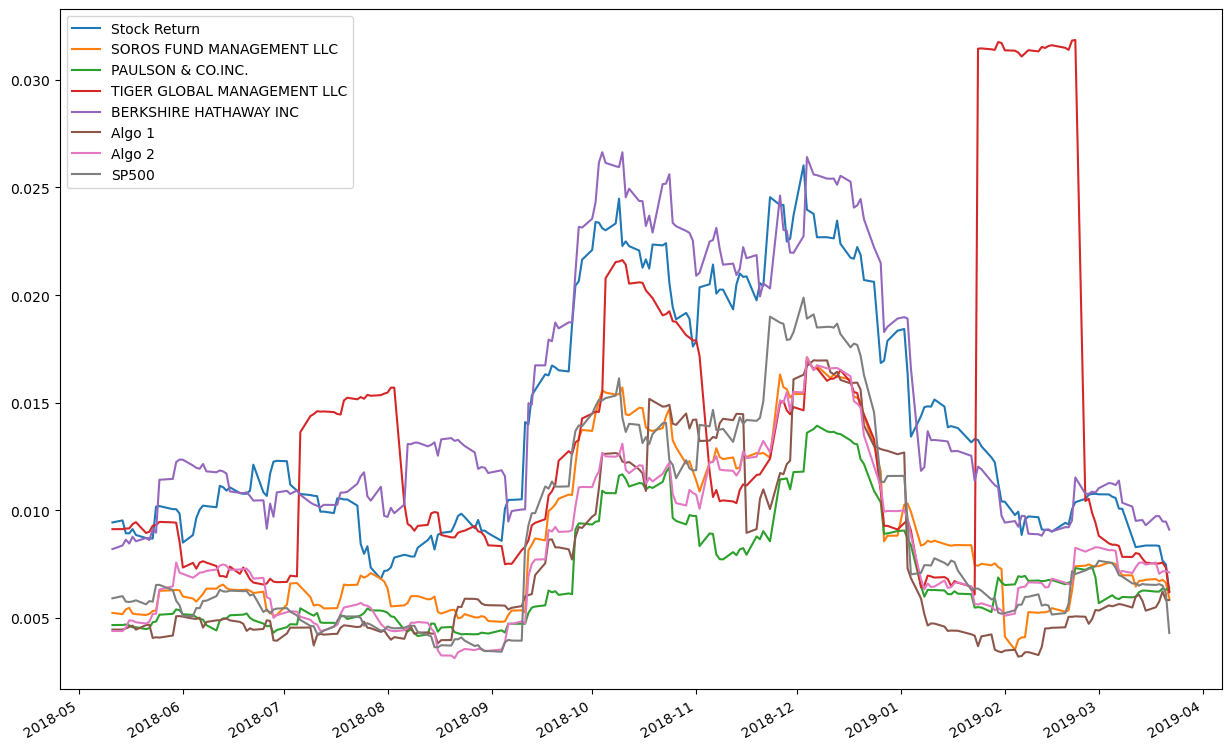

In [38]:
# Calculate rolling standard deviation
portfolio_rolling_21 = df_portfolios.rolling(window = 21).std()
# Plot rolling standard deviation
portfolio_rolling_21.plot(figsize = (15,10))

### Calculate and plot the correlation

<Axes: >

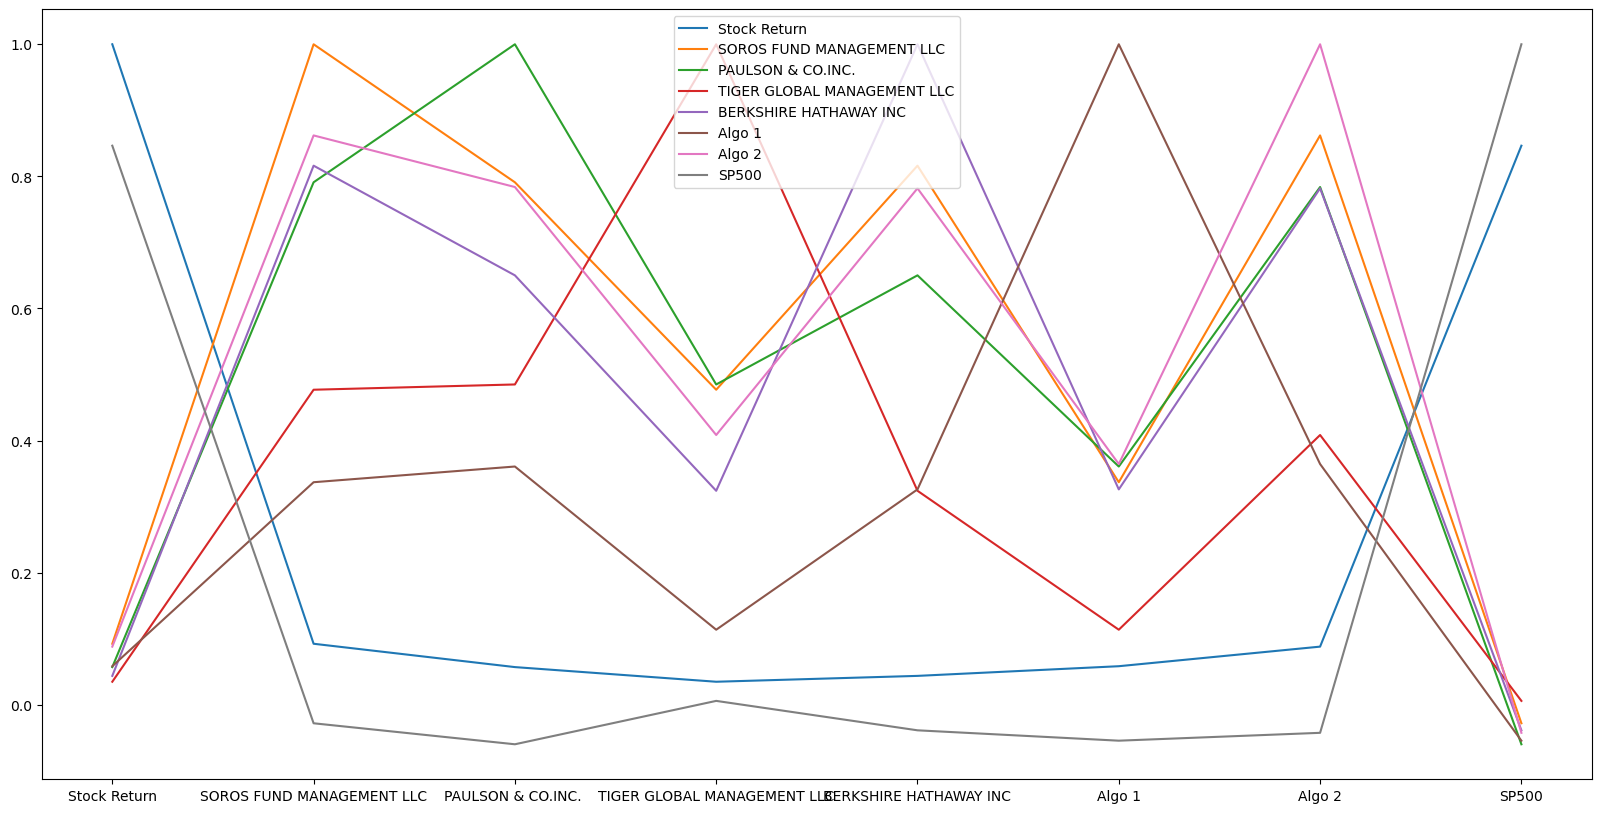

In [39]:
# Calculate and plot the correlation
portfolio_correlation = df_portfolios.corr()
portfolio_correlation.plot(figsize = (20, 10))

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': '60 Day Beta of Stock Returns'}>

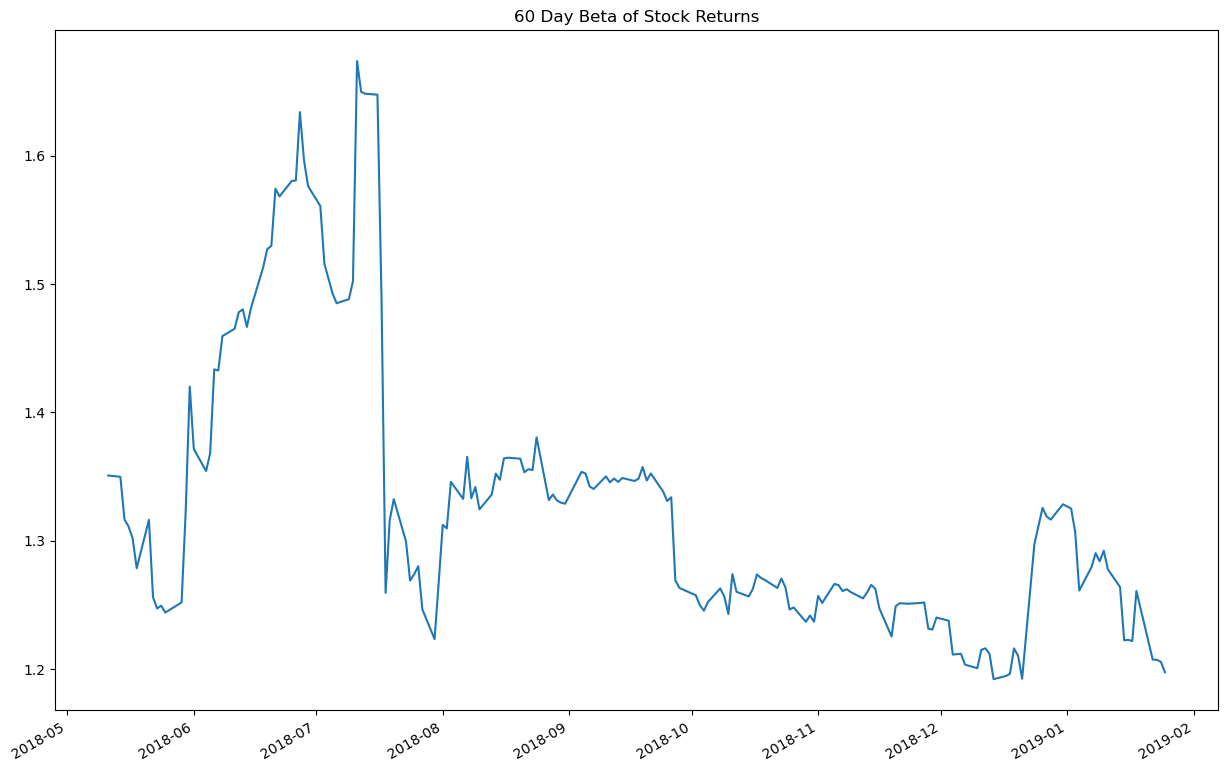

In [40]:
# Calculate and plot Beta
portfolio_covariance = df_portfolios['Stock Return'].rolling(window = 60).cov(df_portfolios['SP500'])
sp500_port_variance = df_portfolios['SP500'].rolling(window = 60).var()
port_beta = portfolio_covariance / sp500_port_variance
port_beta.plot(figsize = (15, 10), title = '60 Day Beta of Stock Returns')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [41]:
# Calculate Annualized Sharpe Ratios
annual_port_sharpe_ratios = df_portfolios.mean()*252 / (df_portfolios.std()*np.sqrt(252))
annual_port_sharpe_ratios

Stock Return                  -0.570096
SOROS FUND MANAGEMENT LLC      0.344766
PAULSON & CO.INC.              0.236041
TIGER GLOBAL MANAGEMENT LLC   -1.052249
BERKSHIRE HATHAWAY INC         0.085005
Algo 1                         1.999866
Algo 2                         0.009467
SP500                         -0.432942
dtype: float64

<Axes: title={'center': 'Annual Portfolio Sharpe Ratio'}>

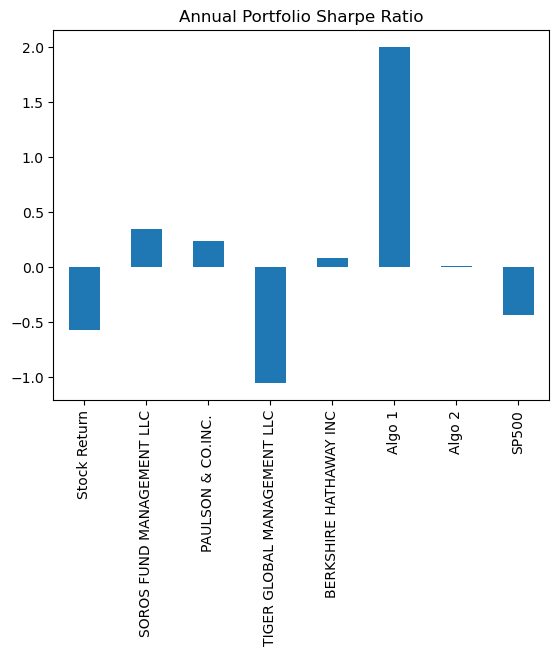

In [42]:
# Visualize the sharpe ratios as a bar plot
annual_port_sharpe_ratios.plot(kind = 'bar', title = 'Annual Portfolio Sharpe Ratio')

### How does your portfolio do?

Write your answer here!

In [43]:
'''Algo 1 outperforms everything by a wide margin'''

'Algo 1 outperforms everything by a wide margin'